In [2]:
import json
import numpy as np
import pandas as pd

In [3]:
with open('../EvolutionaryFramework/results/2023_04_03_11:22:16/result_0.json') as user_file:
  parsed_json = json.load(user_file)
  
# print(json.dumps(parsed_json, indent = 4, sort_keys=True))

In [6]:
data = []
for algorithm in parsed_json:
    for generation in parsed_json[algorithm]:
        for front in parsed_json[algorithm][generation]:
            for individual in parsed_json[algorithm][generation][front]:
                data.append({
                    'algorithm': algorithm,
                    'generation': generation,
                    'front': front,
                    'genome': individual["genome"],
                    'stability': individual["fitness"]["STABILITY"],
                    'tension': individual["fitness"]["TENSION"]
                })
data_df = pd.DataFrame(data)        

In [7]:
data_df.head()

,algorithm,generation,front,genome,stability,tension
0,NSGA-II,generation_2601,front_2,73/0.3125 69/0.125 64/0.1875 64/0.125 64/0.125...,None,None
1,NSGA-II,generation_2601,front_2,73/0.1875 76/0.375 74/0.0625 83/0.1875 78/0.06...,None,None
2,NSGA-II,generation_2601,front_2,81/0.1875 71/0.125 73/0.25 73/0.3125 64/0.0625...,None,None
3,NSGA-II,generation_2601,front_2,61/0.125 61/0.0625 71/0.125 73/0.25 71/0.125 7...,None,None
4,NSGA-II,generation_2601,front_2,61/0.4375 64/0.0625 66/0.3125 64/0.0625 64/0.0...,None,None


In [8]:
data_df.loc[0]

algorithm                                               NSGA-II
generation                                      generation_2601
front                                                   front_2
genome        73/0.3125 69/0.125 64/0.1875 64/0.125 64/0.125...
stability                                                  None
tension                                                    None
Name: 0, dtype: object

In [71]:
generation = data_df[data_df["generation"] == "generation_500"].sort_values(by=['front'])

In [72]:
X, Y = [], []
for front in generation["front"].unique():
    X_front, Y_front = [], []
    front_data = generation[generation["front"] == front]
    for stability in front_data["stability"]:
        X_front.append(stability)
    for tension in front_data["tension"]:
        Y_front.append(tension)
    X.append(X_front)
    Y.append(Y_front)

In [73]:
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

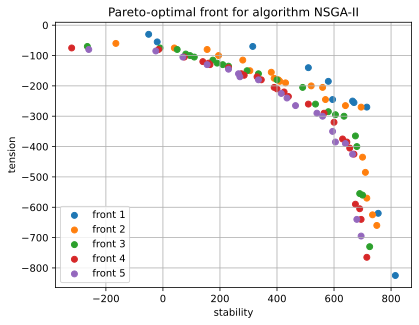

In [74]:
fig, ax = plt.subplots()
ax.set_title("Pareto-optimal front for algorithm NSGA-II")
ax.set_xlabel("stability")
ax.set_ylabel("tension")
ax.grid()

for i, (x,y) in enumerate(zip(X, Y)):
    
    ax.scatter(x, y, label = f"front {i+1}")

plt.legend()
plt.show()


In [75]:
stability = generation[generation["front"] == "front_1"].sort_values(by='stability')

In [76]:
stability

,algorithm,generation,front,genome,stability,tension
2292,NSGA-II,generation_500,front_1,57/0.25 69/0.1875 80/0.1875 71/0.25 62/0.0625 ...,-50.0,-30.0
2291,NSGA-II,generation_500,front_1,0/0.125 64/0.0625 74/0.1875 71/0.125 74/0.125 ...,-20.0,-55.0
2293,NSGA-II,generation_500,front_1,59/0.125 60/0.375 60/0.0625 55/0.0625 61/0.25 ...,315.0,-70.0
2297,NSGA-II,generation_500,front_1,59/0.125 60/0.375 60/0.0625 71/0.0625 61/0.312...,510.0,-140.0
2295,NSGA-II,generation_500,front_1,76/0.0625 67/0.3125 67/0.0625 55/0.0625 55/0.1...,580.0,-185.0
2299,NSGA-II,generation_500,front_1,0/0.0625 55/0.0625 64/0.0625 58/0.0625 60/0.12...,595.0,-245.0
2298,NSGA-II,generation_500,front_1,60/0.0625 60/0.125 76/0.0625 71/0.125 61/0.062...,665.0,-250.0
2296,NSGA-II,generation_500,front_1,76/0.0625 64/0.0625 64/0.25 64/0.0625 55/0.062...,670.0,-255.0
2294,NSGA-II,generation_500,front_1,63/0.0625 64/0.0625 64/0.0625 55/0.1875 54/0.0...,715.0,-270.0
2290,NSGA-II,generation_500,front_1,76/0.0625 72/0.1875 67/0.0625 55/0.125 55/0.06...,755.0,-620.0


In [77]:
stability.loc[2289]['genome']

'76/0.0625 64/0.0625 64/0.0625 55/0.0625 60/0.0625 55/0.125 55/0.0625 67/0.0625 55/0.0625 50/0.0625 60/0.125 76/0.0625 67/0.0625 64/0.0625 62/0.0625 71/0.0625 74/0.125 74/0.25 59/0.0625 59/0.0625 67/0.0625 76/0.0625 67/0.125 55/0.0625 53/0.0625 52/0.0625 52/0.0625 57/0.0625 57/0.0625 69/0.0625 69/0.0625 69/0.0625 52/0.0625 69/0.0625 81/0.0625 76/0.0625 76/0.125 84/0.0625 72/0.0625 60/0.0625 65/0.125 72/0.125 77/0.0625 77/0.125 68/0.0625 84/0.125 84/0.125 63/0.0625 72/0.0625 60/0.0625 84/0.0625 '